In [1]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

###### Data Reading

In [2]:
data=pd.read_csv("creditcard.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Due to confidentiality issue, original features V1, V2,... V28 have been transformed with PCA.

The only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.

Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise

# Exploratory Data Analysis

In [4]:
# Shape of the data frame
data.shape

(284807, 31)

###### So, there are total 31 features and 284807 observations

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

###### No missing value present in the dataset
###### Let's check duplicates

In [6]:
data[data.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


###### The dataframe above presenting the duplicate observations 

In [7]:
data.duplicated().sum()

1081

###### So, in our datset we had 1081 duplicate observations. We must drop those duplicate observations

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [10]:
data.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

Here 1 denote fraud transation and 0 denote legitimate transation.
#####  This dataset has 473 frauds out of 283,726 transactions. The dataset is highly imbalanced

### Distribution of Target Feature

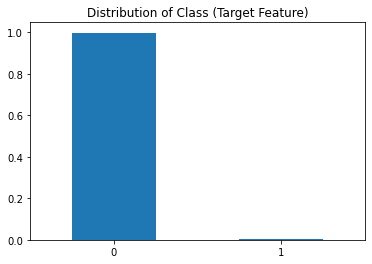

In [11]:
data["Class"].value_counts(normalize=True).plot(kind='bar',rot=0)
plt.title("Distribution of Class (Target Feature)")
plt.show()


###### Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis, our algorithms will probably overfit since it will "assume" that most transactions are not a fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

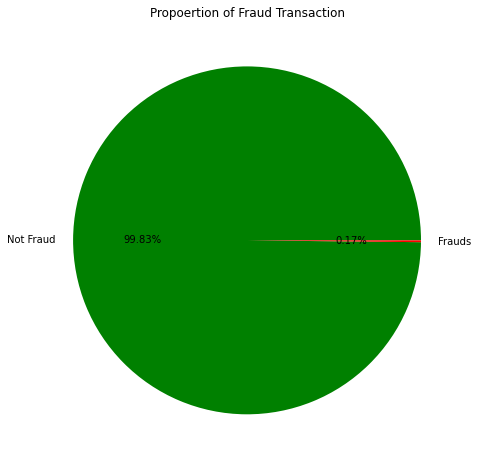

In [12]:
plt.figure(figsize=(12,8))
labels=['Not Fraud' , 'Frauds']
explode = [0,0]
color=['green' , 'red']
plt.pie(data.Class.value_counts().values,explode,labels,autopct="%1.2f%%",colors = color)
plt.title('Propoertion of Fraud Transaction')
plt.show()

###### Here we can see that only 0.16%  of all transations are frauds. Despite of such small persentage of frauds we still need to reduce it. 

### Distribution of amount with respect to different class ( Fraud and Non-fraud)

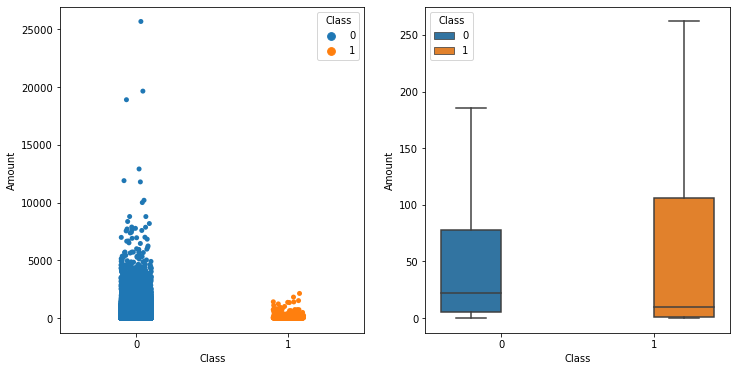

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.stripplot(ax = ax1, x="Class", y="Amount", hue="Class",data=data)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=data,showfliers=False)
plt.show()

##### Most the transaction amount falls between 0 and about 5000 and we have some outliers for really big amount transactions. It is observed that the data contains outliers. The highest amount is over 25000.

### Distribution of Time

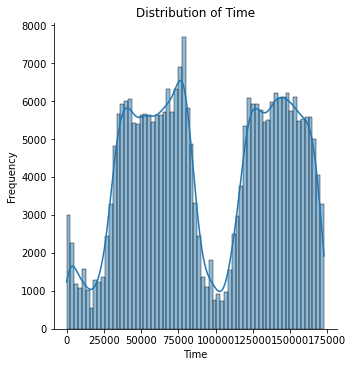

In [14]:
sns.displot(data=data, x="Time", kde=True)
plt.title('Distribution of Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

###### By seeing the graph, we can see there are two peaks in the graph of Time feature and even there are some local peaks. We can think of these as the time of the day like the peak is the day time when most people do the transactions and the depth is the night time when most people just sleeps

### Distribution of Time vs Amount with respect to different class (Fraud and Non-fraud)

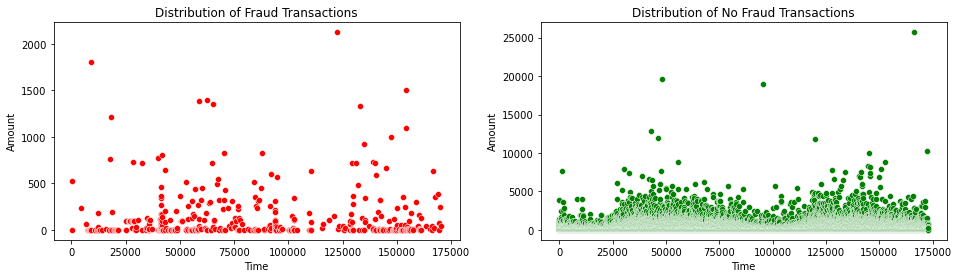

In [15]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.scatterplot(x='Time',y='Amount', data=data[data['Class']==1], ax=axs[0],color='red')
axs[0].set_title("Distribution of Fraud Transactions")

sns.scatterplot(x='Time',y='Amount', data=data[data['Class']==0], ax=axs[1],color='green')
axs[1].set_title("Distribution of No Fraud Transactions")

plt.show()

### Distribution of V1,V2,V3,...,V28

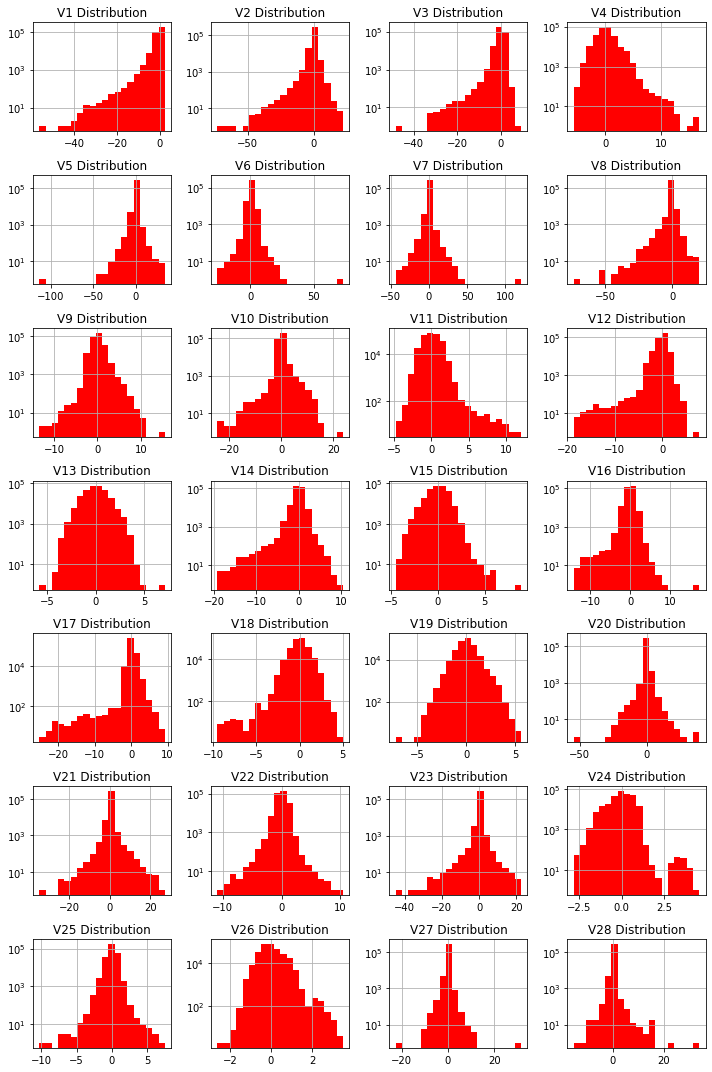

In [16]:
def histograms(Data, features, rows, cols):
    fig=plt.figure(figsize=(10,15))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        Data[feature].hist(bins=20,ax=ax,facecolor='red')
        ax.set_title(feature+" Distribution", color='black')
        ax.set_yscale('log')
    fig.tight_layout()
    plt.show()
histograms(data,data.columns[1:29],7,4) 

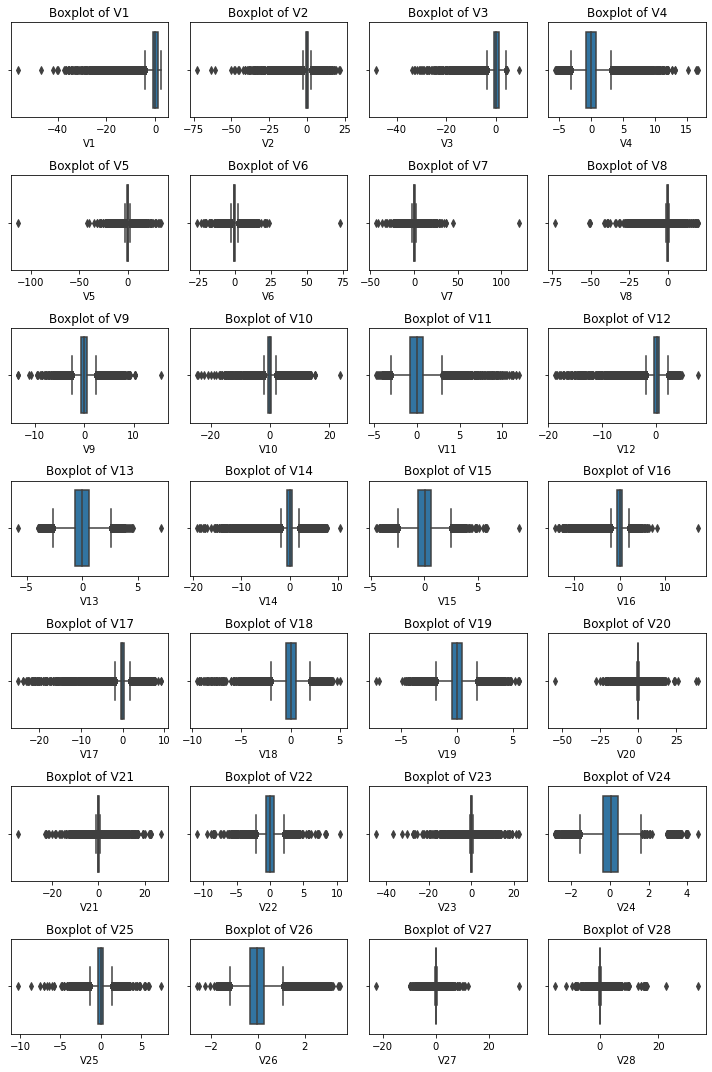

In [17]:
def boxplots(Data, features, rows, cols):
    fig=plt.figure(figsize=(10,15))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        sns.boxplot(x=Data[feature])
        ax.set_title("Boxplot of "+feature, color='black')
        fig.tight_layout()
    plt.show()
boxplots(data,data.columns[1:29],7,4) 

###### Every predictor feature  has huge number of outliers

### Correlation Matrix

In [18]:
corr =data.corr()

corr.style.background_gradient(cmap='coolwarm')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,0.031068,-0.248536,0.125500,-0.065958,-0.100316,-0.184392,0.011286,-0.073819,0.090305,0.029537,-0.051022,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,0.000815,0.001028,-0.001524,-0.000568,-0.002663,-0.000602,-0.003345,-0.003491,-0.003535,0.000919,-0.001393,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,0.000620,-0.000633,0.002266,0.000680,0.002711,0.001538,0.004013,0.003244,0.002477,-0.000358,-0.001287,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,-0.009632,0.002339,-0.005900,0.000113,-0.003027,-0.001230,-0.004430,-0.008159,-0.003495,-0.000016,-0.002269,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,0.002753,-0.001223,0.003366,0.000177,0.002801,0.000572,0.003346,0.003655,0.002325,-0.000560,0.000318,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,-0.006050,0.000411,-0.002342,0.000019,-0.001000,-0.001171,-0.002373,-0.004466,-0.002685,0.000436,-0.001185,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,-0.002180,-0.000211,-0.001185,0.000397,0.000184,-0.000470,0.000122,-0.001716,0.000541,0.000106,-0.000181,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,-0.013617,0.002454,-0.006153,-0.000170,-0.003816,-0.001394,-0.005944,-0.008794,-0.004279,0.000846,-0.001192,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,0.000481,0.004688,-0.004414,-0.001381,-0.008387,0.001044,-0.004376,-0.005576,-0.001323,-0.000626,0.000271,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,-0.012613,-0.000217,-0.002385,0.000745,0.001981,-0.000283,-0.000086,-0.002318,-0.000373,0.000247,-0.001838,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


By oberving above matrix we can conclude that there is no issue of multicolinearity i.e. there is no strong relations among the predictor features.

By observing the last row of the correlation matrix we can find that only **V14, V10, V17, V12, V4** are mostly correlated with **Class**

# Data Preprocessing

First we need to divide our dataset into set set and train set

Here we splitting the dataset into test and train set where 80% of the data are taken as train set and 20% of the data taken as test set.

In [19]:
X=data.drop('Class',axis=1)
y=data['Class']

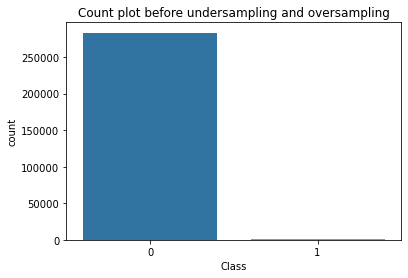

In [20]:
sns.countplot(y)
plt.title('Count plot before undersampling and oversampling')
plt.show()

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y)

In [22]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
200363,133404.0,-1.804805,0.928192,0.544072,-0.793678,0.934168,-0.583448,0.344580,-1.572871,-0.099591,...,-0.763248,1.569281,-0.132836,-0.293055,-0.054264,1.054988,0.766329,-0.029356,0.054315,5.75
137970,82419.0,1.075210,-0.206144,1.297335,1.165393,-0.991094,0.330435,-0.866896,0.458928,0.796960,...,-0.301702,0.058423,0.229926,0.068899,0.174308,0.192983,-0.393068,0.069929,0.021847,1.00
255247,157134.0,0.040162,0.742791,-0.135269,-0.802655,1.029855,-0.588488,0.944283,-0.148562,-0.008090,...,0.045774,-0.315585,-0.746251,-0.036355,-1.003553,-0.335415,0.201764,0.243043,0.089769,5.49
12786,22432.0,-0.781406,0.495656,0.804264,-3.095067,0.369882,-0.052039,0.439057,0.191134,2.909225,...,-0.102371,-0.164505,0.193612,-0.235978,-0.838679,-0.105295,-0.338154,0.475603,0.250835,9.44
37358,38923.0,-1.042409,0.710243,0.861673,-0.745267,0.373971,0.413542,-0.017924,0.749775,-0.112181,...,-0.020751,0.055212,0.304080,-0.243880,-0.732257,-0.061540,0.563222,0.218152,0.073967,1.00


In [23]:
y_train.head()

200363    0
137970    0
255247    0
12786     0
37358     0
Name: Class, dtype: int64

In [24]:
y_train.value_counts()

0    226602
1       378
Name: Class, dtype: int64

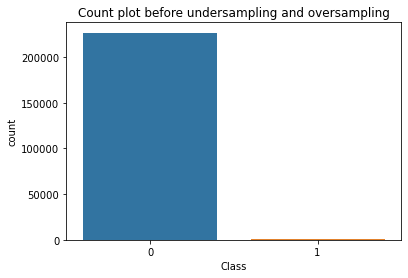

In [25]:
sns.countplot(y_train)
plt.title('Count plot before undersampling and oversampling')
plt.show()

The plot above shows that the 'Class' (target variable) is highly imbalanced. Building a model with imbalanced data can lead to bias towards the class with higher variables (In our case non-fraud class has higher variables).

So, first we have to make our dataset balance before building a model using some statistical technique.
##### We will use Undersampling and Oversampling technique to balance our dataset
##### Undersampling Technique:
  Undersampling is a statistical technique is use to reduce the number of observations of the class(Target feature) which has     higher variables. We will use **Random Under sampling technique** to reduce number of observations which belongs to non-frauds   transactions.
##### Oversampling Technique:
Oversampling is a statistical technique is use to create new sample data with minority class. We will use **SMOTE(Synthetic Minority Oversampling Technique)** 


We will use a library called Imbalance Learn(imblearn) to impliment those techniques on our dataset.

In [26]:
over = SMOTE(sampling_strategy=0.9)
under = RandomUnderSampler(sampling_strategy=0.05)
steps = [('u', under),('o',over)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X_tf,y_tf=pipeline.fit_resample(X_train,y_train)

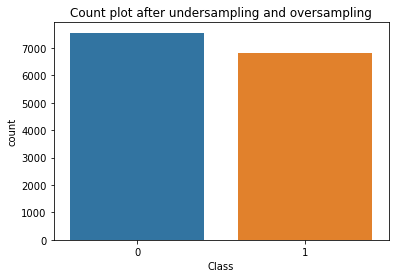

In [27]:
sns.countplot(y_tf)
plt.title('Count plot after undersampling and oversampling')
plt.show()

# Model Building

#### Creating function to build model and evalute it

In [28]:
def model(classifier,x_train,y_train,x_test,y_test):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    plot_roc_curve(classifier, x_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()
    
def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    
    # Classification Report
    print('Classification Report : \n',classification_report(y_test,classifier.predict(x_test)))

#### Logistic Model

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
classifier_lr = LogisticRegression()

Cross Validation Score :  98.81%
ROC_AUC Score :  92.28%


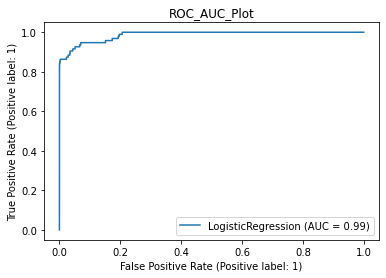

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.08      0.86      0.14        95

    accuracy                           0.98     56746
   macro avg       0.54      0.92      0.57     56746
weighted avg       1.00      0.98      0.99     56746



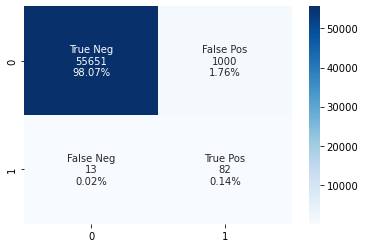

In [31]:
model(classifier_lr,X_tf,y_tf,X_test,y_test)
model_evaluation(classifier_lr,X_test,y_test)

##### Desicion Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(random_state = 1000)

Cross Validation Score :  98.01%
ROC_AUC Score :  92.72%


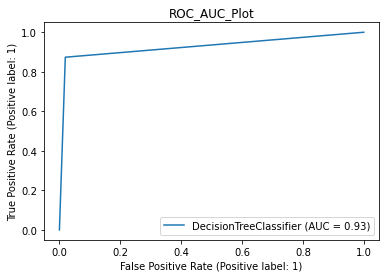

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.07      0.87      0.13        95

    accuracy                           0.98     56746
   macro avg       0.54      0.93      0.56     56746
weighted avg       1.00      0.98      0.99     56746



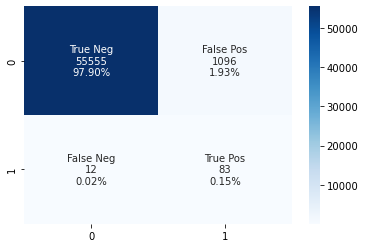

In [33]:
model(classifier_dt,X_tf,y_tf,X_test,y_test)
model_evaluation(classifier_dt,X_test,y_test)

##### Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=999)

Cross Validation Score :  99.98%
ROC_AUC Score :  93.03%


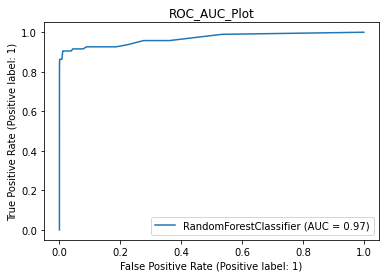

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.37      0.86      0.52        95

    accuracy                           1.00     56746
   macro avg       0.68      0.93      0.76     56746
weighted avg       1.00      1.00      1.00     56746



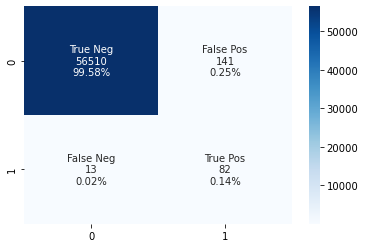

In [35]:
model(classifier_rf,X_tf,y_tf,X_test,y_test)
model_evaluation(classifier_rf,X_test,y_test)

##### XG Boost Classifier

In [36]:
from xgboost import XGBClassifier

In [37]:
classifier_xgb=XGBClassifier()

Cross Validation Score :  99.99%
ROC_AUC Score :  93.01%


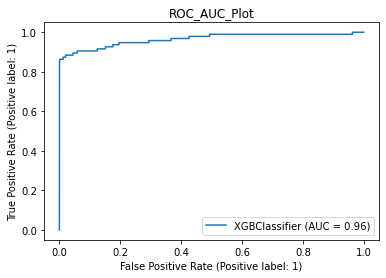

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.34      0.86      0.48        95

    accuracy                           1.00     56746
   macro avg       0.67      0.93      0.74     56746
weighted avg       1.00      1.00      1.00     56746



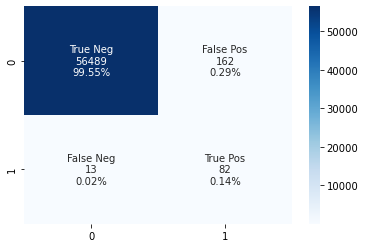

In [38]:
model(classifier_xgb,X_tf,y_tf,X_test,y_test)
model_evaluation(classifier_xgb,X_test,y_test)

##### Adaboost Classifier

In [39]:
from sklearn.ensemble import AdaBoostClassifier

In [40]:
classifier_adb=AdaBoostClassifier()

Cross Validation Score :  99.76%
ROC_AUC Score :  92.53%


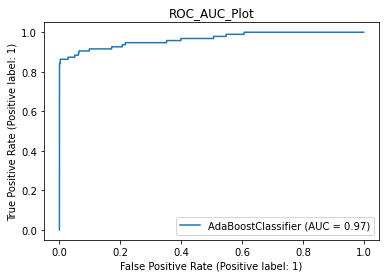

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56651
           1       0.10      0.86      0.18        95

    accuracy                           0.99     56746
   macro avg       0.55      0.93      0.59     56746
weighted avg       1.00      0.99      0.99     56746



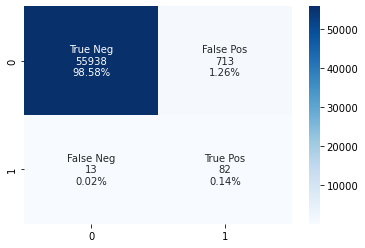

In [41]:
model(classifier_adb,X_tf,y_tf,X_test,y_test)
model_evaluation(classifier_adb,X_test,y_test)

### Model Selection

To make balance in our data we use some over sampling and under sampling techniques. Due to over sampling we have some synthetic data with minority class in our data and for under sampling we losses many data with majority class. So, we can't use accuracy as a metric of model selection. Instead of accuracy we can use weighted average F1 score .

##### ML Alogrithm Results Table :

|Sr. No.|ML Algorithm|Cross Validation Score|ROC AUC Score|Weighted average	F1 Score|
|-|-|-|-|-|
|1|Logistic Regression|98.83%|91.74%|0.99|
|2|Decision Tree Classifier|98.19%|93.74%|0.99|
|3|Random Forest Classifier|99.96%|89.37%|1|
|4|XGBoost Classifier|99.98%|89.87%|1|
|5|AdaBoost Classifier|99.75%|90.99%|0.99|

So, on the basis of weighted average f1-score we can conclude that **Random Forest** and **XGBOOST** are the best models for this dataset

# Conclusion

We find that the best models for this data are **Random Forest** and **XGBoost**. Also out of all predictor features only **V14, V10, V12, V4, V17** are most correlated with responce feature **Class** 